# Nonlinear Benchmark Workshop Datasets

> Fill in a module description here

In [ ]:
#| default_exp workshop

In [ ]:
#| export
from sysbench_loader.core import *
import nonlinear_benchmarks
from nonlinear_benchmarks.utilities import Input_output_data
from pathlib import Path

In [ ]:
#| hide
import matplotlib.pyplot as plt

In [ ]:
tmp_dir = Path('./tmp')

## Wiener Hammerstein Dataset

In [ ]:
#| export
def wiener_hammerstein(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False # force download the dataset
):
    train_val, test = nonlinear_benchmarks.WienerHammerBenchMark(force_download=force_download)
    split_idx = 80_000
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path)

In [ ]:
wiener_hammerstein(tmp_dir / 'wh' )

## Silverbox Dataset

In [ ]:
#| export
def silverbox(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False # force download the dataset
):
    train_val, test = nonlinear_benchmarks.Silverbox(force_download=force_download)
    split_idx = 50_000
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path)

In [ ]:
silverbox(tmp_dir / 'silverbox')

## Cascaded Tanks Dataset

In [ ]:
#| export
def cascaded_tanks(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False # force download the dataset
):
    train_val, test = nonlinear_benchmarks.Cascaded_Tanks(force_download=force_download)
    train = train_val
    valid = train_val

    dataset_to_hdf5(train,valid,test,save_path)

In [ ]:
cascaded_tanks(tmp_dir  / 'cascaded_tanks' )

## EMPS Dataset

In [ ]:
#| export
def emps(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False # force download the dataset
):
    train_val, test = nonlinear_benchmarks.EMPS(force_download=force_download)
    split_idx = 18_000
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path)

In [ ]:
emps(tmp_dir  / 'emps')

## Noisy Wiener Hammerstein

In [ ]:
#| export
from scipy.io import loadmat
def noisy_wh(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False # force download the dataset
):
    'the wiener hammerstein dataset with process noise'

    #extract raw .mat files, to preserve filenames necessary for train, valid split
    matfiles = nonlinear_benchmarks.not_splitted_benchmarks.WienerHammerstein_Process_Noise(data_file_locations=True,train_test_split=False,force_download=force_download)

    for file in matfiles:
        f_path = Path(file)
        save_path = Path(save_path)

        if 'Test' in f_path.stem:
            hdf_path = save_path / 'test'
        elif 'Combined' in f_path.stem:
            hdf_path = save_path / 'valid'
        else:
            hdf_path = save_path / 'train'

        out = loadmat(f_path)
        _,u,y,fs = out['dataMeas'][0,0]
        fs = fs[0,0]
        for idx,(ui,yi) in enumerate(zip(u.T,y.T)):
            iodata = Input_output_data(u=ui,y=yi, sampling_time=1/fs)
            fname = f'{f_path.stem}_{idx+1}'
            iodata_to_hdf5(iodata,hdf_path,fname)

In [ ]:
noisy_wh(tmp_dir / 'noisy_wh' )

## Parallel Wienerhammerstein

In [ ]:
#ToDo

## F16

In [ ]:
#ToDo

## Coupled Electric Drives

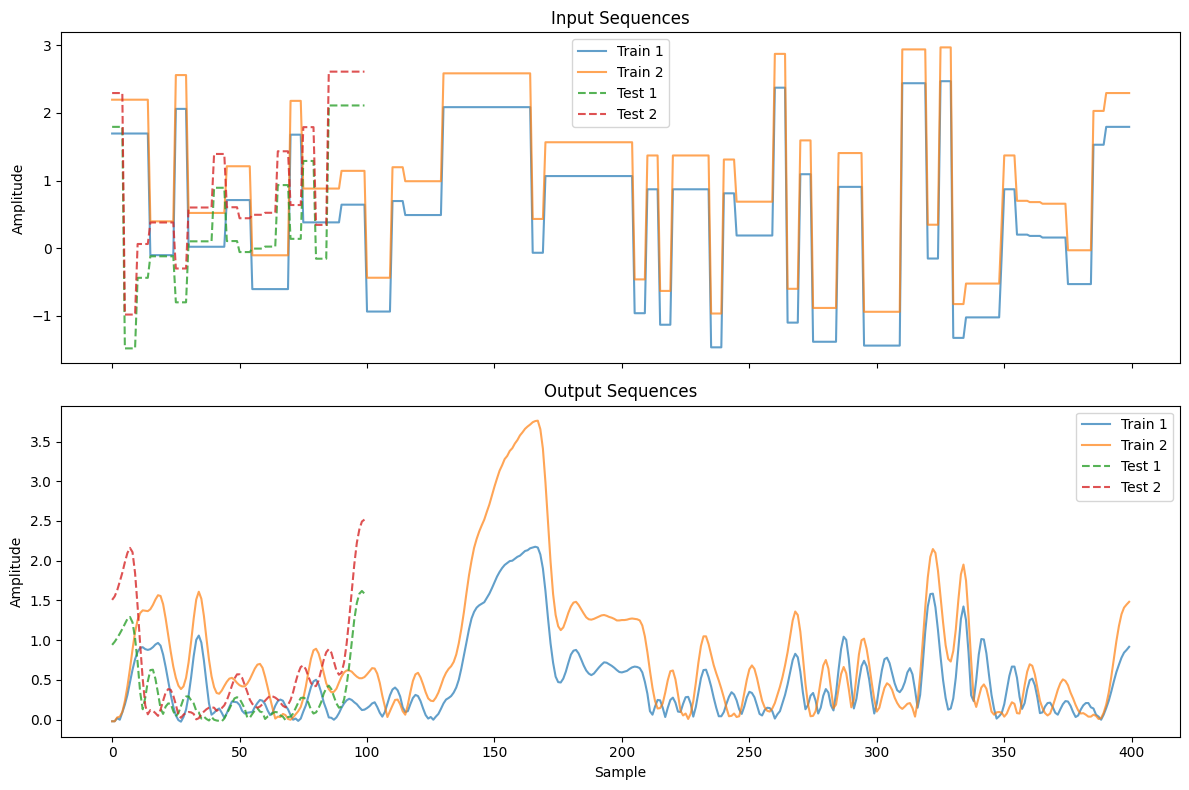

In [ ]:
train_val, test = nonlinear_benchmarks.CED()

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
# Plot training/validation data
for i, data in enumerate(train_val):
    axs[0].plot(data.u, alpha=0.7, label=f'Train {i+1}')
    axs[1].plot(data.y, alpha=0.7, label=f'Train {i+1}')

# Plot test data
for i, data in enumerate(test):
    axs[0].plot(data.u, ls='--', alpha=0.8, label=f'Test {i+1}')
    axs[1].plot(data.y, ls='--', alpha=0.8, label=f'Test {i+1}')

axs[0].set_title('Input Sequences')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

axs[1].set_title('Output Sequences')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

plt.tight_layout()

In [ ]:
#| export
def ced(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False # force download the dataset
):
    train_val, test = nonlinear_benchmarks.CED(force_download=force_download,always_return_tuples_of_datasets=True)
    split_idx = 300
    train = tuple(x[:split_idx] for x in train_val)
    valid = tuple(x[split_idx:] for x in train_val)

    dataset_to_hdf5(train,valid,test,save_path)

In [ ]:
ced(tmp_dir / 'ced' )

In [ ]:
#| hide
#clean temporary hdf5 file
import shutil
#shutil.rmtree(tmp_dir)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()